In [9]:
import numpy as np
import librosa
from hmmlearn import hmm

# Load the audio file
file_path = "21036-ai.wav"  # Assuming the file is in the same directory as your notebook
signal, sr = librosa.load(file_path, sr=None)

# Extract STFT features
stft = np.abs(librosa.stft(signal))

# Convert STFT features to observation sequence
obs_seq = np.transpose(stft)

# Train an HMM model
num_states = 3  # Number of states in the HMM
num_mix = 1     # Number of mixtures in each state
model = hmm.GaussianHMM(n_components=num_states, covariance_type="full", n_iter=1000)
model.fit(obs_seq)

# Classify using trained HMM model
predicted_labels = model.predict(obs_seq)

# Output the predicted labels
print("Predicted labels:", predicted_labels)

Predicted labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


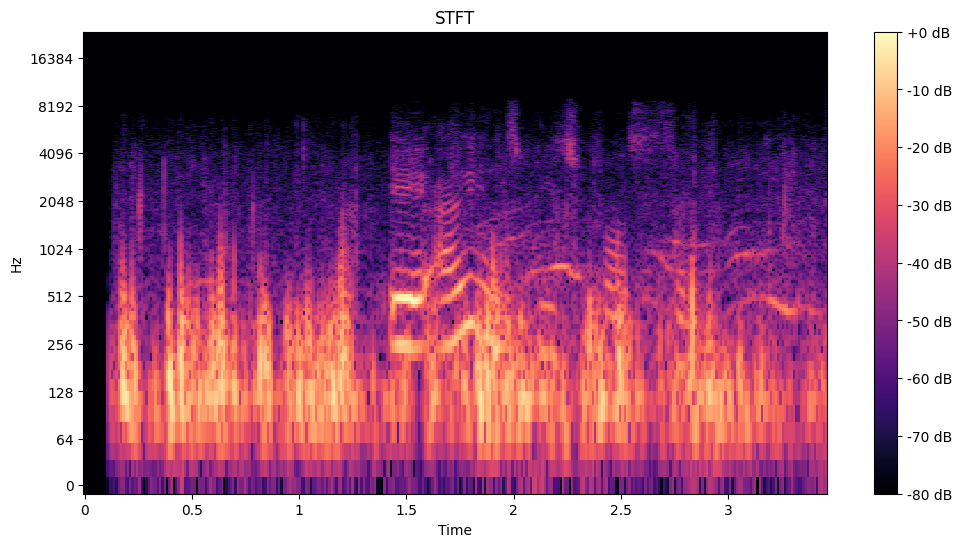

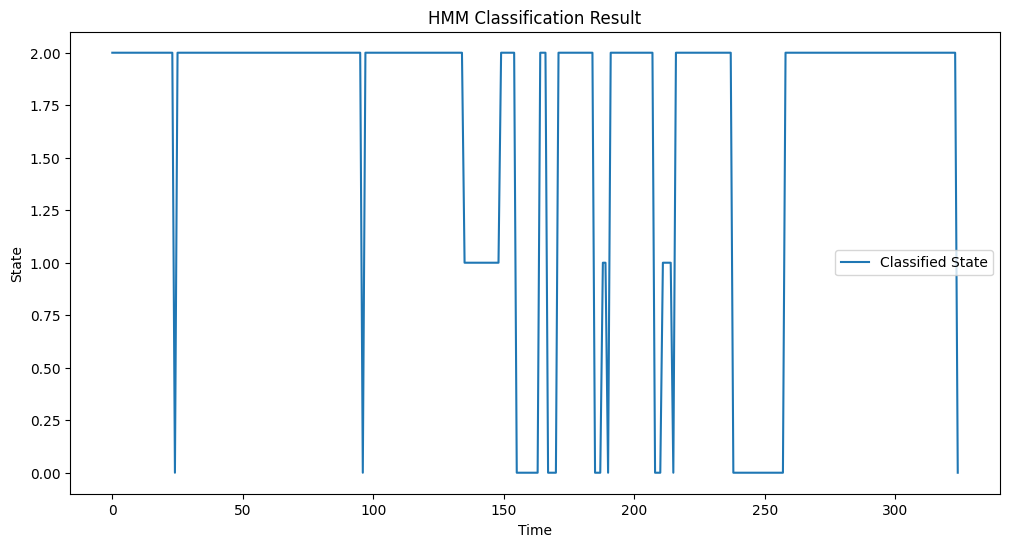

HMM Model Parameters:
Transition Matrix:
[[0.79069767 0.04651163 0.1627907 ]
 [0.1        0.85       0.05      ]
 [0.02713007 0.00735269 0.96551724]]
Means:
[[4.51627238e-01 1.08486121e+00 4.16092782e+00 ... 2.67554700e-04
  2.66092474e-04 2.25082367e-04]
 [4.69857730e-01 1.08081172e+00 3.54108860e+00 ... 9.98435011e-04
  1.07844837e-03 1.07247837e-03]
 [6.28886785e-01 1.48961160e+00 5.62191578e+00 ... 2.26951573e-04
  2.42886512e-04 2.24607775e-04]]
Covariances:
[[[2.30872620e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 8.93066516e-01 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.17993814e+01 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.32693077e-04
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   2.32705571e-04 0.00000000e+00]
  [0.00000000e+00 0.0

In [16]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

def load_audio(file_path):
    ydata, sr = librosa.load(file_path, sr=None)
    return ydata, sr

def stft_features(ydata, sr):
    stft = np.abs(librosa.stft(ydata))
    return stft

def train_hmm(features, n_components=3, n_iter=100):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=n_iter)
    model.fit(features)
    return model

def plot_stft(stft, sr):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT')
    plt.show()

def classify_signal(model, features):
    # Predict using the trained HMM model
    labels = model.predict(features.T)  # Transpose features to fit HMM's requirement
    return labels

def main():
    audio_file_path = r"21036-ai.wav"

    y, sr = load_audio(audio_file_path)

    # Extract STFT features
    stft = stft_features(y, sr)

    # Plot STFT
    plot_stft(stft, sr)

    # Train HMM
    model = train_hmm(stft.T)  # Transpose stft to fit HMM's requirement

    # Classify signal using trained HMM
    labels = classify_signal(model, stft)

    # Plot the classification result
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(labels)), labels, label='Classified State')
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.title('HMM Classification Result')
    plt.legend()
    plt.show()

    # Print trained model parameters
    print("HMM Model Parameters:")
    print("Transition Matrix:")
    print(model.transmat_)
    print("Means:")
    print(model.means_)
    print("Covariances:")
    print(model.covars_)

if __name__ == "__main__":
    main()

In [15]:
!pip install librosa
!pip install hmmlearn